# Classifier introduction


In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# define matrix containing data and label vector
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
y = [1, 0, 0, 0, 1, 1]

# Declare classification model and fit
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

print(clf.predict([[0, 1, 1]]))
print(clf.predict([[1, 0, 1],[0, 0, 1]]))


[0]
[1 0]


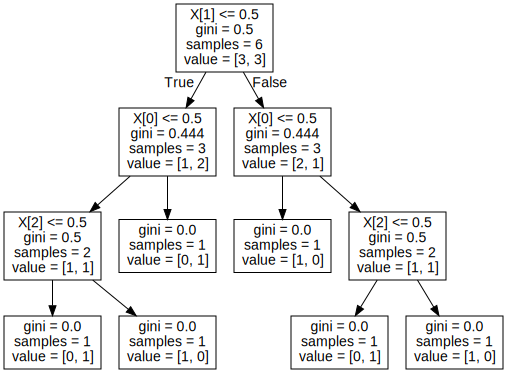

In [6]:
import graphviz

# Export tree in DOT data and render with graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [9]:
from sklearn.datasets import load_iris
import numpy as np

# load iris dataset
iris = load_iris()
clf = DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1, 1:1, 2:1})

# test train split with numpy with shuffle
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# Keep last 10 indices for test
indices_training = indices[:-10]
indices_test = indices[-10:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test = iris.data[indices_test]
iris_y_test = iris.target[indices_test]

# Fit tree
clf = clf.fit(iris_X_train, iris_y_train)

In [10]:
# Predictions

predicted_y_test = clf.predict(iris_X_test)
print("Predictions")
print(predicted_y_test)
print("Actual")
print(iris_y_test)

Predictions
[1 2 1 0 0 0 2 1 2 0]
Actual
[1 1 1 0 0 0 2 1 2 0]


In [13]:
for i in range(len(iris_y_test)):
    print(f"Instance # {str(indices_test[i])}: ")
    print(f"Predicted: {iris.target_names[predicted_y_test[i]]}\t Actual: {iris.target_names[iris_y_test[i]]}\n")

Instance # 88: 
Predicted: versicolor	 Actual: versicolor

Instance # 70: 
Predicted: virginica	 Actual: versicolor

Instance # 87: 
Predicted: versicolor	 Actual: versicolor

Instance # 36: 
Predicted: setosa	 Actual: setosa

Instance # 21: 
Predicted: setosa	 Actual: setosa

Instance # 9: 
Predicted: setosa	 Actual: setosa

Instance # 103: 
Predicted: virginica	 Actual: virginica

Instance # 67: 
Predicted: versicolor	 Actual: versicolor

Instance # 117: 
Predicted: virginica	 Actual: virginica

Instance # 47: 
Predicted: setosa	 Actual: setosa



In [14]:
# Model performance results
from sklearn.metrics import accuracy_score, f1_score

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print(f"Accuracy score: {str(acc_score)}")
f_score = f1_score(iris_y_test, predicted_y_test, average="macro")
print(f"F1 score: {str(f_score)}")

Accuracy score: 0.9
F1 score: 0.8857142857142858


In [20]:
from sklearn.model_selection import cross_val_score
# Cross validation 
clf = DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # Score will be accuracy
print(scores)
# F1 scores
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring="f1_macro")
print(f1_scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]
[0.96658312 1.         0.86111111 0.86666667 1.        ]


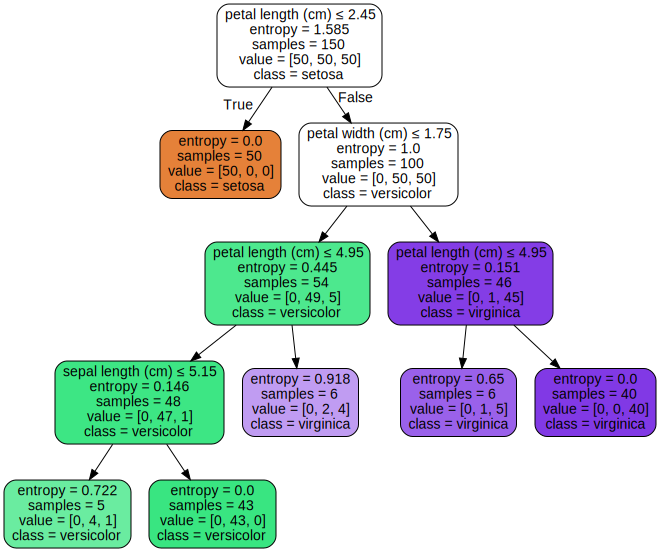

In [22]:
# Show resulting tree

dot_data = export_graphviz(clf, out_file=None, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("Iris Predictions")
graph

